Projeto 1 : "Em quais características certo grupo de aposentados está melhor (ou pior ou igual) do que algum outro grupo de comparação?"
  Introdução:
    Neste projeto a população de aposentados será analisada em relação a grupos denominados como PEA(população economicamente ativa)
    a fim de observar se a previdência é algo que realmente funciona. Entretando, vamos analisar grupos da PEA próximos da aposentadoria, ou seja
    que possuem idade entre 50 e 60 anos.
    
   
* Aposentados de 2014 vs Aposentados de 1992:
Variáveis a serem analisadas:

- Rendimento da aposentadoria # V1252 - Quantitativa

- Idade # - Quantitativa

- Contribuição para previdência privada # V9120 - Qualitativa

- Sexo #V0302 - Qualitativa

- Estado civil #V4011 - Qualitativa/tabela

- Faixa de rendimento mensal domiciliar per capita # V4743 - Quantitativa/tabela




In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:


dados14 = pd.read_csv('PES2014.csv', sep=',') # 2014
#dados01 = pd.read_csv('PES2011.csv',sep = ',') # 1992


In [5]:
dados14.iloc[:,2] # == UF

0         11
1         11
2         11
3         11
4         11
5         11
6         11
7         11
8         11
9         11
10        11
11        11
12        11
13        11
14        11
15        11
16        11
17        11
18        11
19        11
20        11
21        11
22        11
23        11
24        11
25        11
26        11
27        11
28        11
29        11
          ..
362597    53
362598    53
362599    53
362600    53
362601    53
362602    53
362603    53
362604    53
362605    53
362606    53
362607    53
362608    53
362609    53
362610    53
362611    53
362612    53
362613    53
362614    53
362615    53
362616    53
362617    53
362618    53
362619    53
362620    53
362621    53
362622    53
362623    53
362624    53
362625    53
362626    53
Name: UF, dtype: int64

In [6]:
#v0102 = UF

In [7]:
#dados.shape
#DADOS.shape

In [8]:
n = dados14.shape[0]

   
#col_name =dados.columns[0]
#dados=dados.rename(columns = {col_name:'1992'})

#col_name =DADOS.columns[0]
#DADOS=DADOS.rename(columns = {col_name:'2014'})

In [9]:
# Separando o DataFrame - Aposentados
aposentados14 = dados14[(dados14.V9122 == 2)]
aposentados14.head()
n14 = aposentados14.shape[0]

In [10]:
# Separando DataFrame - Não aposentados maiores de 50 anos
não_aposentados14_50plus = dados14[(dados14.V9122 ==4) & (dados14.V8005 > 50)]
não_aposentados14_50plus.head()
n_não = não_aposentados14_50plus.shape[0]

In [11]:
#Condição para tirar o Nan da renda mensal
d_renda14 = aposentados14[(aposentados14.V1252 != 999999999999)& (~aposentados14.V1252.isnull())]
redimento_mensal_domiciliar_14 = aposentados14[(aposentados14.V4742!=999999999999) & (aposentados14.V4742.isnull()) ]


Variáveis: A escolha de parâmetros do que realmente será analisado dependerá de quais variáveis forem escolhidas. Como estamos querendo analisar o grupo de aposentados
e uma parcela da PEA com idade próxima da aposentadoria, serão utilizadas tanto variáveis qualitativas quanto quantitativas.

In [12]:
#Condição aposentados mais velho 60 +
aposentados14_60plus = aposentados14[(aposentados14.V8005 >= 60)]
aposentados14_60plus.head()
n_60 = aposentados14_60plus.shape[0]

In [13]:
seletivo14_não_aposentados = não_aposentados14_50plus[['UF','V1252','V9120','V8005','V0404','V0302','V4011','V4742']] 

In [14]:
seletivo14_não_aposentados.columns = ['UF','Rendimento mensal','Investimento previdência privada','Idade','Raça',
'Sexo','Estado civil','Rendimento mensal domiciliar per capita']

In [15]:
d_renda_não_aposentados14 = não_aposentados14_50plus[não_aposentados14_50plus.V1252 != 999999999999] # IMPOSSÍVEL, ELES NÃO RECEBEM APOSENTADORIA
d_renda_familiar_não_aposentados = não_aposentados14_50plus[não_aposentados14_50plus.V4742 != 999999999999]

In [16]:
seletivo14_não_aposentados

,UF,Rendimento mensal,Investimento previdência privada,Idade,Raça,Sexo,Estado civil,Rendimento mensal domiciliar per capita
3,11,NaN,4.0,51,2,2,0.0,1.150000e+03
7,11,NaN,4.0,60,2,2,NaN,1.700000e+03
15,11,NaN,4.0,60,8,2,NaN,8.500000e+02
16,11,NaN,4.0,58,8,4,NaN,8.500000e+02
17,11,NaN,4.0,55,2,4,NaN,3.220000e+03
18,11,NaN,4.0,60,2,2,NaN,3.220000e+03
33,11,NaN,4.0,58,8,2,NaN,1.000000e+12
44,11,NaN,4.0,56,2,2,NaN,2.330000e+02
45,11,NaN,4.0,55,2,4,NaN,2.330000e+02
59,11,NaN,4.0,55,2,2,NaN,1.505000e+03


Podemos observar que o grupo de não aposentados possui Nan em todos os valores de Rendimento Mensal, isso porque, este é igual
ao valor ganho na aposentadoria. Entretanto, é possível observar o ganho mensal familiar desse grupo.

In [17]:
seletivo14 = aposentados14[['UF','V1252','V9120','V8005','V0404','V0302','V4011','V4742']] 

In [18]:
seletivo14.describe()

,UF,V1252,V9120,V8005,V0404,V0302,V4011,V4742
count,38643.000000,3.864300e+04,38643.000000,38643.000000,38643.000000,38643.000000,19765.000000,3.861400e+04
mean,32.448982,1.612194e+10,3.948917,67.386952,4.541262,3.015863,3.735441,4.529445e+10
std,10.139305,1.259461e+11,0.315530,10.574217,2.844989,0.999887,3.131646,2.079519e+11
min,11.000000,6.100000e+02,2.000000,11.000000,0.000000,2.000000,0.000000,8.000000e+01
25%,26.000000,7.240000e+02,4.000000,61.000000,2.000000,2.000000,0.000000,7.240000e+02
50%,32.000000,7.240000e+02,4.000000,67.000000,2.000000,4.000000,5.000000,9.200000e+02
75%,41.000000,1.400000e+03,4.000000,74.000000,8.000000,4.000000,7.000000,1.699750e+03
max,53.000000,1.000000e+12,4.000000,112.000000,8.000000,4.000000,7.000000,1.000000e+12


In [19]:
seletivo14.columns = ['UF','Rendimento mensal','Investimento previdência privada','Idade','Raça',
                     'Sexo','Estado civil','Rendimento mensal domiciliar per capita']

In [20]:
seletivo14

,UF,Rendimento mensal,Investimento previdência privada,Idade,Raça,Sexo,Estado civil,Rendimento mensal domiciliar per capita
5,11,724.0,4.0,77,2,4,7.0,7.240000e+02
11,11,724.0,4.0,68,8,4,1.0,8.550000e+02
25,11,724.0,4.0,65,2,2,NaN,2.362000e+03
26,11,2500.0,4.0,62,8,4,NaN,2.362000e+03
51,11,724.0,4.0,90,4,2,7.0,4.440000e+02
62,11,724.0,4.0,73,2,4,7.0,3.620000e+02
66,11,724.0,4.0,65,2,2,NaN,2.862000e+03
77,11,724.0,4.0,58,2,4,7.0,9.240000e+02
82,11,724.0,4.0,59,2,4,7.0,1.440000e+02
87,11,1019.0,4.0,63,2,4,5.0,1.321000e+03


In [21]:
#Criando uma coluna para UF
seletivo14.insert(1,'Regiao',0)

In [22]:
seletivo14

,UF,Regiao,Rendimento mensal,Investimento previdência privada,Idade,Raça,Sexo,Estado civil,Rendimento mensal domiciliar per capita
5,11,0,724.0,4.0,77,2,4,7.0,7.240000e+02
11,11,0,724.0,4.0,68,8,4,1.0,8.550000e+02
25,11,0,724.0,4.0,65,2,2,NaN,2.362000e+03
26,11,0,2500.0,4.0,62,8,4,NaN,2.362000e+03
51,11,0,724.0,4.0,90,4,2,7.0,4.440000e+02
62,11,0,724.0,4.0,73,2,4,7.0,3.620000e+02
66,11,0,724.0,4.0,65,2,2,NaN,2.862000e+03
77,11,0,724.0,4.0,58,2,4,7.0,9.240000e+02
82,11,0,724.0,4.0,59,2,4,7.0,1.440000e+02
87,11,0,1019.0,4.0,63,2,4,5.0,1.321000e+03


In [23]:
seletivo14_60 = aposentados14_60plus[['UF','V1252','V9120','V8005','V0404','V0302','V4011','V4742']] 

In [24]:
#Identificação da região
seletivo14_60.loc[seletivo14_60.UF<=17,'Regiao'] = 'Norte'
seletivo14_60.loc[(seletivo14_60.UF>=21) & (seletivo14_60.UF<31),'Regiao'] = 'Nordeste'
seletivo14_60.loc[(seletivo14_60.UF>=31) & (seletivo14_60.UF<41),'Regiao'] = 'Sudeste'
seletivo14_60.loc[(seletivo14_60.UF>=41) & (seletivo14_60.UF<50),'Regiao'] = 'Sul'
seletivo14_60.loc[(seletivo14_60.UF>=50),'Regiao'] = 'Centro-Oeste'

C:\Users\Gustavo Gobetti\Anaconda\lib\site-packages\pandas\core\indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Gustavo Gobetti\Anaconda\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
seletivo14_60

,UF,V1252,V9120,V8005,V0404,V0302,V4011,V4742,Regiao
5,11,724.0,4.0,77,2,4,7.0,7.240000e+02,Norte
11,11,724.0,4.0,68,8,4,1.0,8.550000e+02,Norte
25,11,724.0,4.0,65,2,2,NaN,2.362000e+03,Norte
26,11,2500.0,4.0,62,8,4,NaN,2.362000e+03,Norte
51,11,724.0,4.0,90,4,2,7.0,4.440000e+02,Norte
62,11,724.0,4.0,73,2,4,7.0,3.620000e+02,Norte
66,11,724.0,4.0,65,2,2,NaN,2.862000e+03,Norte
87,11,1019.0,4.0,63,2,4,5.0,1.321000e+03,Norte
88,11,724.0,4.0,62,8,2,0.0,1.321000e+03,Norte
98,11,724.0,4.0,71,8,2,1.0,7.620000e+02,Norte


In [26]:
seletivo14_60.insert(1,'Regiao',0)

ValueError: cannot insert Regiao, already exists

In [ ]:
seletivo14_60.columns = ['UF','Rendimento mensal','Investimento previdência privada','Idade','Raça',
                     'Sexo','Estado civil','Rendimento mensal domiciliar per capita','Regiao']

In [ ]:
seletivo14_60

Agora que estalecemos todas as variáveis que vamos analisar, vamos criá-las no programa. Para relembrar, o grupo a ser analisado, será o de aposentados, o de aposentados com apenas mais de 60 anos e os de não aposentados com mais de 50 anos no ano de 2014.

In [31]:
###
aposentados14.rendimento_ind = aposentados14.V1252.astype("float")

aposentados14_60plus.rendimento_ind = aposentados14_60plus.V1252.astype("float")

não_aposentados14_50plus.rendimento = não_aposentados14_50plus.V1252.astype("float")
###
aposentados14.investimento_previdência = aposentados14.V9120.astype("float")

aposentados14_60plus.investimento_previdência = aposentados14_60plus.V9120.astype("float")

não_aposentados14_50plus.investimento_previdência = não_aposentados14_50plus.V9120.astype("float")

###
aposentados14.idade = aposentados14.V8005.astype("float")

aposentados14_60plus.idade = aposentados14_60plus.V8005.astype("float")

não_aposentados14_50plus.idade = não_aposentados14_50plus.V8005.astype("float")
###
aposentados14.raça = aposentados14.V0404.astype("float")

aposentados14_60plus.raça = aposentados14_60plus.V0404.astype("float")

não_aposentados14_50plus.raça = não_aposentados14_50plus.V0404.astype("float")

###
aposentados14.sexo = aposentados14.V0302.astype("category")

aposentados14_60plus.sexo = aposentados14_60plus.V0302.astype("category")

não_aposentados14_50plus.sexo = não_aposentados14_50plus.V0302.astype("category")
###
aposentados14.Ec = aposentados14.V4011.astype("float")

aposentados14_60plus.Ec = aposentados14_60plus.V4011.astype("float")

não_aposentados14_50plus.Ec = não_aposentados14_50plus.V4011.astype("float")
###
aposentados14.rendimento_fam = aposentados14.V4742.astype("float")

aposentados14_60plus.rendimento_fam = aposentados14_60plus.V4742.astype("float")

não_aposentados14_50plus.rendimento_fam = não_aposentados14_50plus.V4742.astype("float")


Serão feitas agora, as frequências relativas das variáveis selecionadas. A cada 3 gráficos será analisado a difrença entre os grupos selecionados.

In [32]:
aposentados14.V1251.dropna()

5         1.0
11        1.0
25        1.0
26        1.0
51        1.0
62        1.0
66        1.0
77        1.0
82        1.0
87        1.0
88        1.0
98        1.0
103       1.0
138       1.0
183       1.0
195       1.0
197       1.0
198       1.0
213       1.0
232       1.0
257       1.0
267       1.0
280       1.0
281       1.0
372       1.0
373       1.0
374       1.0
375       1.0
382       1.0
383       1.0
         ... 
361904    1.0
361909    1.0
361974    1.0
361978    1.0
361982    1.0
362016    1.0
362024    1.0
362059    1.0
362063    1.0
362077    1.0
362080    1.0
362095    1.0
362105    1.0
362108    1.0
362120    1.0
362165    1.0
362194    1.0
362202    1.0
362218    1.0
362239    1.0
362344    1.0
362369    1.0
362436    1.0
362441    1.0
362450    1.0
362470    1.0
362542    1.0
362547    1.0
362549    1.0
362555    1.0
Name: V1251, dtype: float64

In [33]:
#Tirando Nans Renda
aposentados14.rendimento_ind = aposentados14.rendimento_ind[~aposentados14.rendimento_ind.isnull()]
aposentados14.rendimento_ind.head()

5      724.0
11     724.0
25     724.0
26    2500.0
51     724.0
Name: V1252, dtype: float64

In [34]:
d_renda14.describe()


,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
count,38020.000000,38020.0,38020.000000,38020.000000,38020.000000,38020.000000,38020.000000,38020.000000,38020.000000,38020.000000,...,37993.000000,3.799300e+04,37993.000000,38020.000000,38020.000000,10034.000000,11004.000000,38020.000000,3.799300e+04,38020.0
mean,193871.904524,2014.0,32.425381,2852.833798,8.861520,1.486875,3.017149,14.450026,6.992320,1876.586560,...,2.849288,2.968968e+10,6.818019,2.798632,1.736086,1.559199,1.569611,1.710573,2.808412e+10,20160623.0
std,98888.160836,0.0,10.154437,2508.927737,5.665979,0.858831,0.999866,9.079079,4.205584,355.440195,...,1.525465,1.697320e+11,16.177625,1.929532,0.440759,0.496508,0.495153,0.453502,1.652154e+11,0.0
min,5.000000,2014.0,11.000000,10.000000,1.000000,1.000000,2.000000,0.000000,1.000000,19.000000,...,1.000000,8.000000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+01,20160623.0
25%,110578.500000,2014.0,26.000000,921.000000,4.000000,1.000000,2.000000,6.000000,4.000000,1939.000000,...,2.000000,7.240000e+02,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.240000e+02,20160623.0
50%,199204.500000,2014.0,32.000000,2214.000000,9.000000,1.000000,4.000000,14.000000,7.000000,1946.000000,...,2.000000,9.010000e+02,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.120000e+02,20160623.0
75%,283456.250000,2014.0,41.000000,4302.000000,13.000000,2.000000,4.000000,22.000000,10.000000,1953.000000,...,4.000000,1.612000e+03,5.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.624000e+03,20160623.0
max,362555.000000,2014.0,53.000000,73146.000000,183.000000,12.000000,4.000000,31.000000,20.000000,2003.000000,...,18.000000,1.000000e+12,99.000000,8.000000,2.000000,2.000000,2.000000,2.000000,1.000000e+12,20160623.0


In [35]:
   redimento_mensal_domiciliar_14.describe()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
count,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,0.0,0.0,0.0,29.000000,29.000000,20.000000,20.000000,29.000000,0.0,29.0
mean,205972.379310,2014.0,34.103448,2682.448276,7.758621,3.103448,3.517241,16.275862,8.344828,1881.482759,...,NaN,NaN,NaN,2.206897,1.310345,1.900000,1.900000,1.310345,NaN,20160623.0
std,102740.645375,0.0,10.718292,2481.204540,6.265867,1.263352,0.870988,11.122360,4.194178,345.424441,...,NaN,NaN,NaN,1.633998,0.470824,0.307794,0.307794,0.470824,NaN,0.0
min,26743.000000,2014.0,15.000000,10.000000,1.000000,2.000000,2.000000,0.000000,1.000000,86.000000,...,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,20160623.0
25%,151141.000000,2014.0,29.000000,1189.000000,3.000000,2.000000,4.000000,4.000000,5.000000,1940.000000,...,NaN,NaN,NaN,1.000000,1.000000,2.000000,2.000000,1.000000,NaN,20160623.0
50%,208915.000000,2014.0,33.000000,1656.000000,6.000000,3.000000,4.000000,16.000000,9.000000,1946.000000,...,NaN,NaN,NaN,2.000000,1.000000,2.000000,2.000000,1.000000,NaN,20160623.0
75%,280231.000000,2014.0,41.000000,4024.000000,11.000000,4.000000,4.000000,27.000000,12.000000,1950.000000,...,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,20160623.0
max,359267.000000,2014.0,53.000000,10169.000000,25.000000,6.000000,4.000000,30.000000,20.000000,1966.000000,...,NaN,NaN,NaN,7.000000,2.000000,2.000000,2.000000,2.000000,NaN,20160623.0


Coeficiente angular a:  86.8109527755
Coeficiente linear b:  -4672.22697597


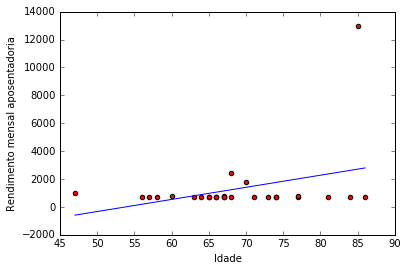

In [36]:
D = aposentados14[(aposentados14.V1252 != 999999999999)& (~aposentados14.V1252.isnull())&(aposentados14.V4742!=999999999999) & (aposentados14.V4742.isnull())]

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color='red')

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='blue')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
scatter_and_line(D, "V8005", "V1252" )
plt.xlabel("Idade")
plt.ylabel("Rendimento mensal aposentadoria")




Coeficiente angular a:  134.1710773
Coeficiente linear b:  -8171.4445486


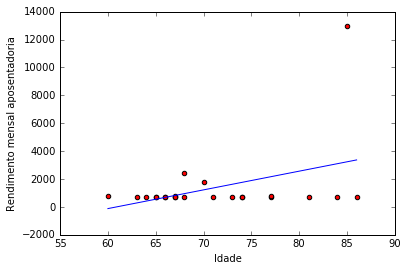

In [37]:
D1 =  aposentados14_60plus[(aposentados14_60plus.V1252 != 999999999999)&(aposentados14_60plus.V1252 !=-1)& (~aposentados14_60plus.V1252.isnull())&(aposentados14_60plus.V4742!=999999999999) & (aposentados14_60plus.V4742.isnull())]

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color='red')

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='blue')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
scatter_and_line(D1, "V8005", "V1252" )
plt.xlabel("Idade")
plt.ylabel("Rendimento mensal aposentadoria")



Análise : Nos dois gráficos acima, tomou-se como premissa as variáveis de rendimento mensal da aposentadoria e a idade. Percebe-se
que no primeiro gráfico existem valores negativos que, se não forem levados em consideração, mostram que os aposentados começam a declarar
sua renda mensal de aposentadoria a partir dos 60 anos. Ou seja, por algum motivo, a população aposentada com menos de 60 anos não divulga
o valor de sua renda mensal.

Coeficiente angular a:  134.1710773
Coeficiente linear b:  -8171.4445486


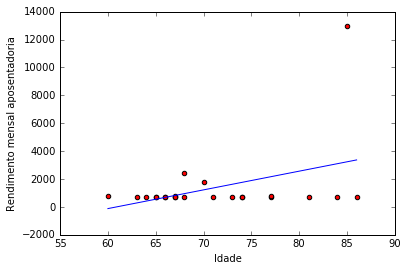

In [38]:
D = aposentados14[(aposentados14.V1252 != 999999999999)& (~aposentados14.V1252.isnull())&(aposentados14_60plus.V1252 !=-1)&(aposentados14.V4742!=999999999999) & (aposentados14.V4742.isnull())]

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color='red')

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='blue')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
scatter_and_line(D, "V8005", "V1252" )
plt.xlabel("Idade")
plt.ylabel("Rendimento mensal aposentadoria")

In [39]:
#ESPAÇO QUANTITATIVA RENDA MENSAL - Não Aposentados 2014 > 50. 

In [40]:

#ESPAÇO QUANTITATIVA RENDA MENSAL - ANÁLISE

In [41]:
#aposentados14.investimento_previdência.isnull()
aposentados14.investimento_previdência.isnull 

<bound method NDFrame.isnull of 5         4.0
11        4.0
25        4.0
26        4.0
51        4.0
62        4.0
66        4.0
77        4.0
82        4.0
87        4.0
88        4.0
98        4.0
103       4.0
138       4.0
183       4.0
195       4.0
197       4.0
198       4.0
213       4.0
232       4.0
257       4.0
267       4.0
280       4.0
281       4.0
372       4.0
373       4.0
374       4.0
375       4.0
382       4.0
383       4.0
         ... 
361904    4.0
361909    4.0
361974    4.0
361978    4.0
361982    4.0
362016    4.0
362024    4.0
362059    4.0
362063    4.0
362077    4.0
362080    4.0
362095    4.0
362105    4.0
362108    4.0
362120    4.0
362165    4.0
362194    4.0
362202    4.0
362218    4.0
362239    4.0
362344    4.0
362369    4.0
362436    4.0
362441    4.0
362450    4.0
362470    4.0
362542    4.0
362547    4.0
362549    4.0
362555    4.0
Name: V9120, dtype: float64>

Investimento em previdência privada:
4.0    97.4
2.0     2.6
Name: V9120, dtype: float64 



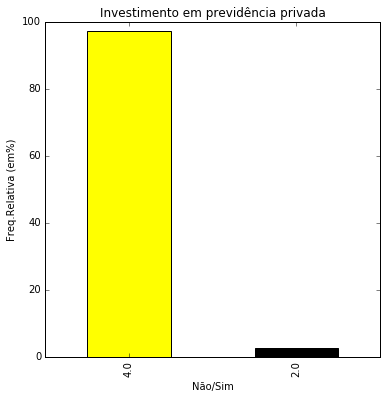

In [42]:
#Aposentados 2014 - todas as idades
print('Investimento em previdência privada:')
ut1 = (aposentados14.investimento_previdência.value_counts()/n14*100).round(decimals=1).reindex(['4.0', '2.0'])
print(ut1,'\n')

plot = ut1.plot(kind='bar',title='Investimento em previdência privada',figsize=(6, 6),color=('yellow','black'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Não/Sim')


In [43]:
aposentados14_60plus.investimento_previdência.isnull

<bound method NDFrame.isnull of 5         4.0
11        4.0
25        4.0
26        4.0
51        4.0
62        4.0
66        4.0
87        4.0
88        4.0
98        4.0
103       4.0
183       4.0
197       4.0
213       4.0
232       4.0
257       4.0
267       4.0
280       4.0
281       4.0
372       4.0
373       4.0
374       4.0
375       4.0
382       4.0
383       4.0
405       4.0
468       4.0
470       4.0
498       4.0
504       4.0
         ... 
361804    4.0
361805    4.0
361806    4.0
361808    4.0
361837    4.0
361838    4.0
361904    4.0
361909    4.0
361974    4.0
361978    4.0
361982    4.0
362016    4.0
362063    4.0
362077    4.0
362105    4.0
362108    4.0
362120    4.0
362165    4.0
362194    4.0
362202    4.0
362218    4.0
362239    4.0
362344    4.0
362369    4.0
362441    4.0
362450    4.0
362470    4.0
362547    4.0
362549    4.0
362555    4.0
Name: V9120, dtype: float64>

Investimento em previdência privada:
4.0    97.8
2.0     2.2
Name: V9120, dtype: float64 



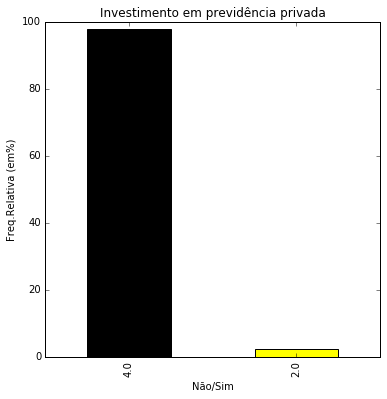

In [44]:
#Aposentados 2014 - 60 plus
print('Investimento em previdência privada:')
ut2 = (aposentados14_60plus.investimento_previdência.value_counts()/n_60*100).round(decimals=1).reindex(['4.0', '2.0'])
print(ut2,'\n')

plot = ut2.plot(kind='bar',title='Investimento em previdência privada',figsize=(6, 6),color=('black','yellow'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Não/Sim')

In [45]:
não_aposentados14_50plus.investimento_previdência.isnull

<bound method NDFrame.isnull of 3         4.0
7         4.0
15        4.0
16        4.0
17        4.0
18        4.0
33        4.0
44        4.0
45        4.0
59        4.0
60        4.0
67        4.0
69        4.0
70        4.0
99        4.0
119       4.0
120       4.0
150       4.0
184       4.0
201       4.0
202       4.0
203       4.0
218       4.0
231       4.0
237       4.0
240       4.0
252       4.0
258       4.0
261       4.0
312       4.0
         ... 
362264    4.0
362320    2.0
362321    4.0
362345    4.0
362357    4.0
362364    4.0
362370    4.0
362381    4.0
362384    4.0
362416    4.0
362418    4.0
362419    4.0
362442    4.0
362445    4.0
362448    4.0
362471    4.0
362481    4.0
362484    4.0
362503    4.0
362517    4.0
362518    4.0
362534    4.0
362548    4.0
362557    4.0
362558    4.0
362580    4.0
362604    4.0
362609    4.0
362610    4.0
362616    4.0
Name: V9120, dtype: float64>

Investimento em previdência privada:
4.0    96.9
2.0     3.1
Name: V9120, dtype: float64 



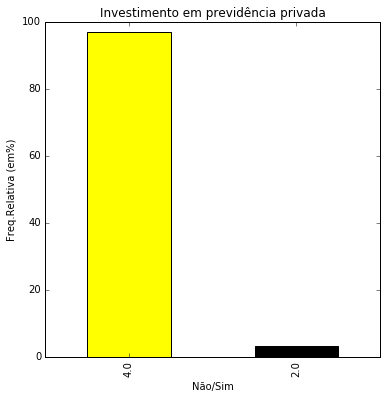

In [46]:
# Não-Aposentados 2014 - 50 plus
print('Investimento em previdência privada:')
ut3 = (não_aposentados14_50plus.investimento_previdência.value_counts()/n_não*100).round(decimals=1).reindex(['4.0', '2.0'])
print(ut3,'\n')

plot = ut3.plot(kind='bar',title='Investimento em previdência privada',figsize=(6, 6),color=('Yellow','Black'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Não/Sim')

Análise: Comparando numericamente, é possível observar um padrão entre os 3 grupos selecionados, que seria que todos praticamente não investem em um fundo de aposentadoria privado. Apenas no grupo de não aposentados com mais de 50 anos pode-ser ver um ligeiro aumento de 1% na escolha, mas nada que interfira no padrão geral.

In [47]:
aposentados14.idade.isnull

<bound method NDFrame.isnull of 5         77.0
11        68.0
25        65.0
26        62.0
51        90.0
62        73.0
66        65.0
77        58.0
82        59.0
87        63.0
88        62.0
98        71.0
103       67.0
138       39.0
183       63.0
195       49.0
197       69.0
198       39.0
213       89.0
232       67.0
257       77.0
267       77.0
280       63.0
281       60.0
372       66.0
373       63.0
374       69.0
375       61.0
382       68.0
383       63.0
          ... 
361904    84.0
361909    64.0
361974    66.0
361978    92.0
361982    60.0
362016    76.0
362024    59.0
362059    54.0
362063    94.0
362077    72.0
362080    49.0
362095    58.0
362105    66.0
362108    60.0
362120    71.0
362165    87.0
362194    68.0
362202    76.0
362218    64.0
362239    65.0
362344    70.0
362369    83.0
362436    52.0
362441    83.0
362450    67.0
362470    62.0
362542    57.0
362547    67.0
362549    70.0
362555    74.0
Name: V8005, dtype: float64>

In [48]:
aposentados14.idade.describe()

count    38643.000000
mean        67.386952
std         10.574217
min         11.000000
25%         61.000000
50%         67.000000
75%         74.000000
max        112.000000
Name: V8005, dtype: float64

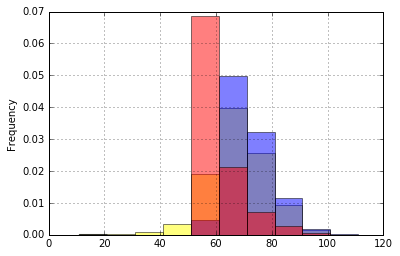

In [49]:
#ESPAÇO QUANTITATIVA IDADE- Aposentados 2014
faixa = np.arange(11, 112,10)
variavel_categorica14 = pd.cut(aposentados14.idade, faixa)
variavel_categorica14.value_counts()
plot = aposentados14.idade.plot.hist(bins = faixa, alpha = 0.5 ,color = 'yellow',normed = 1)
plot = aposentados14_60plus.idade.hist(bins = faixa,alpha = 0.5 ,color = 'blue',normed = 1)
variavel_categorica60plus = pd.cut(aposentados14_60plus.idade,faixa)

variavel_categorica60plus.value_counts()

variavel_categorica50plus = pd.cut(não_aposentados14_50plus.idade,faixa)
variavel_categorica50plus.value_counts()
plot = não_aposentados14_50plus.idade.hist(bins = faixa, alpha = 0.5, color = 'red',normed = 1)

Análise: Através desse gráfico, é possível analisar que apenas as pessoas que estão em amarelho são aposentados com menos de 50 anos.
Além disso, vide o grupo de análise de não aposentados possuir apenas mais que 50 anos, concluí-se que o grupo com maior frêquencia esá
entre 50 e 80 anos.


In [50]:
D.describe()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
count,23.000000,23.0,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,0.0,0.0,0.0,23.000000,23.000000,15.000000,15.000000,23.000000,0.0,23.0
mean,210692.956522,2014.0,34.608696,2807.043478,7.869565,3.086957,3.478261,17.652174,8.217391,1862.217391,...,NaN,NaN,NaN,2.173913,1.347826,1.866667,1.866667,1.347826,NaN,20160623.0
std,105834.079993,0.0,11.320694,2589.374872,5.643213,1.239980,0.897956,10.973558,4.512171,387.260654,...,NaN,NaN,NaN,1.774880,0.486985,0.351866,0.351866,0.486985,NaN,0.0
min,26743.000000,2014.0,15.000000,10.000000,1.000000,2.000000,2.000000,0.000000,1.000000,86.000000,...,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,20160623.0
25%,163577.000000,2014.0,30.000000,1229.500000,4.000000,2.000000,3.000000,6.500000,5.000000,1938.000000,...,NaN,NaN,NaN,1.000000,1.000000,2.000000,2.000000,1.000000,NaN,20160623.0
50%,208915.000000,2014.0,33.000000,1740.000000,7.000000,3.000000,4.000000,24.000000,9.000000,1946.000000,...,NaN,NaN,NaN,2.000000,1.000000,2.000000,2.000000,1.000000,NaN,20160623.0
75%,296860.000000,2014.0,42.000000,3928.500000,10.500000,4.000000,4.000000,27.500000,11.500000,1947.500000,...,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,20160623.0
max,359267.000000,2014.0,53.000000,10169.000000,25.000000,6.000000,4.000000,30.000000,20.000000,1953.000000,...,NaN,NaN,NaN,7.000000,2.000000,2.000000,2.000000,2.000000,NaN,20160623.0


In [54]:
aposentados14.Ec.isnull()

5         False
11        False
25         True
26         True
51        False
62        False
66         True
77        False
82        False
87        False
88        False
98        False
103       False
138        True
183       False
195        True
197       False
198       False
213       False
232        True
257       False
267       False
280        True
281        True
372        True
373        True
374        True
375        True
382        True
383        True
          ...  
361904    False
361909     True
361974     True
361978    False
361982    False
362016    False
362024     True
362059     True
362063    False
362077     True
362080     True
362095     True
362105    False
362108     True
362120    False
362165    False
362194    False
362202    False
362218    False
362239    False
362344    False
362369    False
362436    False
362441     True
362450    False
362470     True
362542    False
362547    False
362549     True
362555    False
Name: V4011, dtype: bool

Conclusão: Concluí-se que, a partir da análise, é mais complexo analisar 3 grupos diferentes dentro de uma mesma pnad, vide a quantidade de informações que estão disponíveis e o número de variáveis criadas. Por esse motivo não foi possível realizar uma análise completa de todas as variáveis selecionadas nas tabelas. Entretanto, observando as variáveis que foram analisadas, percebeu-se que a população de aposentados com menos de 60 anos não declara sua renda mensal, esse motivo não pode ser totalmente claro apenas analisando dados pois possui também uma conjuntura subjetiva de cada um, porém é um padrão entre aqueles com a idade menor de 60 anos. Além disso, esta mesma população de aposentados com menos de 60 anos apresenta-se em pequena quantidade, mas ainda sim é existente. Isso porque, segundo a previdência brasileira, para se tornar aposentado é necessário trabalhar 35 anos(carteira de trabalho assinada) ou ser maior de 60 anos. Atualmente isso não é um problema para o Brasil, pois a População economicamente ativa(PEA) é muito maior que o número de aposentados, ou seja, para cada 3 indivíduos que trabalham no Brasil há uma equivalência para 1 aposentado. No entanto, daqui alguns anos esse cenário irá se reverter e por isso, é necessário uma possível reforma da previdência para balancear a PEA e o número de aposentados. E o último fator dentro desse contexto seria a iniciativa privada referente à previdência, ela é praticamente inexistente no momento no Brasil e talvez seja uma alternativa para balencear os cofres públicos brasileiros. 